In [3]:
#over sample the minority data using smote analysis
import numpy as npy
import pandas as pds
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as mplt
import seaborn as sbn
%matplotlib inline

train_data = pds.read_csv('trainData.csv')

In [10]:
from collections import Counter
counts = (Counter(train_data.TenYearCHD))
counts

Counter({0.0: 2864, 1.0: 528})

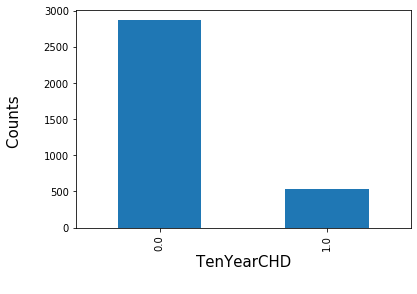

In [21]:
pds.value_counts(train_data['TenYearCHD']).plot.bar()
mplt.xlabel('TenYearCHD\n ', fontsize=15)
mplt.ylabel('Counts \n', fontsize=15)
mplt.savefig('class.png')

In [22]:
x_inputs = train_data.iloc[:, 0:15]
y_label = train_data.iloc[:, -1]

In [23]:
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_sample(x_inputs, y_label)

In [24]:
column = x_inputs.columns
cls = ['TenYearCHD']
attri = pds.DataFrame(X_resampled, columns = column)
label = pds.DataFrame(y_resampled, columns = cls)
new_data_smote = pds.concat([attri,label], axis = 1)

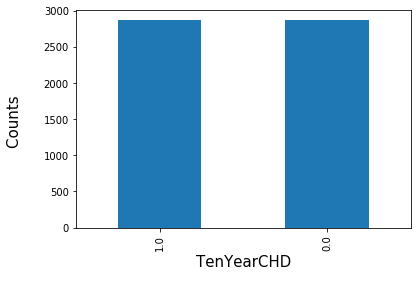

In [26]:
pds.value_counts(new_data_smote['TenYearCHD']).plot.bar()
mplt.xlabel('TenYearCHD\n ', fontsize=15)
mplt.ylabel('Counts \n', fontsize=15)
mplt.savefig('class.png')

In [25]:
print(Counter(new_data_smote.TenYearCHD))

Counter({0.0: 2864, 1.0: 2864})


In [7]:
from sklearn.utils import shuffle
new_data_smote = shuffle(new_data_smote)

In [8]:
new_data_smote.reset_index(inplace=True, drop=True)
new_data_smote.head(20)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.000000,47.000000,3.000000,1.000000,25.000000,0.0,0.0,0.000000,0.0,261.000000,105.000000,74.000000,20.600000,85.000000,75.000000,0.0
1,0.552962,53.741472,2.000000,1.000000,20.000000,0.0,0.0,0.000000,0.0,298.741472,112.276481,76.341113,23.012926,77.235188,93.976661,1.0
2,0.048078,52.951922,1.048078,0.000000,0.000000,0.0,0.0,0.951922,0.0,303.336545,128.336545,90.903844,27.500963,60.192311,76.855767,1.0
3,0.000000,48.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,224.000000,131.000000,92.000000,26.100000,68.000000,75.400000,0.0
4,0.328572,44.699993,1.671428,1.000000,34.271442,0.0,0.0,0.000000,0.0,203.914304,141.357138,88.314290,21.491430,80.728558,80.248575,1.0
5,0.000000,53.000000,3.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,260.000000,139.000000,80.000000,20.300000,72.000000,76.000000,0.0
6,0.000000,59.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,251.704609,122.599249,76.164630,27.623237,84.755411,103.738477,1.0
7,0.660349,40.660349,2.339651,1.000000,16.603490,0.0,0.0,0.000000,0.0,211.320698,108.943141,66.047383,24.928279,77.622443,73.282792,1.0
8,0.000000,44.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,178.000000,113.000000,78.000000,31.900000,64.000000,74.000000,0.0
9,1.000000,47.079205,2.693068,1.000000,16.534658,0.0,0.0,0.000000,0.0,190.881192,130.227727,83.693068,23.518808,55.346534,74.613863,1.0


In [10]:
columns =(new_data_smote.columns)
x = ''
st = [x+y for y in columns]
st = ','.join([str(elem) for elem in st])
st

'male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD'

In [11]:
#npy.savetxt('trainDataSMOTE.csv', new_data_smote, delimiter=',', fmt='%f', newline='\n', header = st)

In [12]:
new_data_smote

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.000000,47.000000,3.000000,1.0,25.000000,0.0,0.0,0.000000,0.0,261.000000,105.000000,74.000000,20.600000,85.000000,75.000000,0.0
1,0.552962,53.741472,2.000000,1.0,20.000000,0.0,0.0,0.000000,0.0,298.741472,112.276481,76.341113,23.012926,77.235188,93.976661,1.0
2,0.048078,52.951922,1.048078,0.0,0.000000,0.0,0.0,0.951922,0.0,303.336545,128.336545,90.903844,27.500963,60.192311,76.855767,1.0
3,0.000000,48.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,224.000000,131.000000,92.000000,26.100000,68.000000,75.400000,0.0
4,0.328572,44.699993,1.671428,1.0,34.271442,0.0,0.0,0.000000,0.0,203.914304,141.357138,88.314290,21.491430,80.728558,80.248575,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5723,0.759455,57.391826,1.240545,1.0,18.797275,0.0,0.0,0.000000,0.0,219.089264,114.240545,71.898638,25.731619,67.405449,60.518910,1.0
5724,0.000000,38.000000,3.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,240.000000,126.500000,75.500000,24.400000,71.000000,64.000000,0.0
5725,1.000000,64.000000,4.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,273.000000,123.000000,73.500000,22.300000,75.000000,84.000000,1.0
5726,1.000000,68.000000,1.000000,1.0,15.000000,0.0,0.0,0.000000,0.0,157.000000,106.000000,48.000000,26.700000,65.000000,65.000000,1.0
